## Step 1: Load the Data

In [84]:
import pandas as pd
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [85]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Data Cleaning


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [87]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [46]:
df.isnull().sum()  # there is no null values .

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [47]:
df_clean = df.drop("ID#", axis=1) # since we are not using it any clustering, so its better to drop this column.

## EDA (Plots)


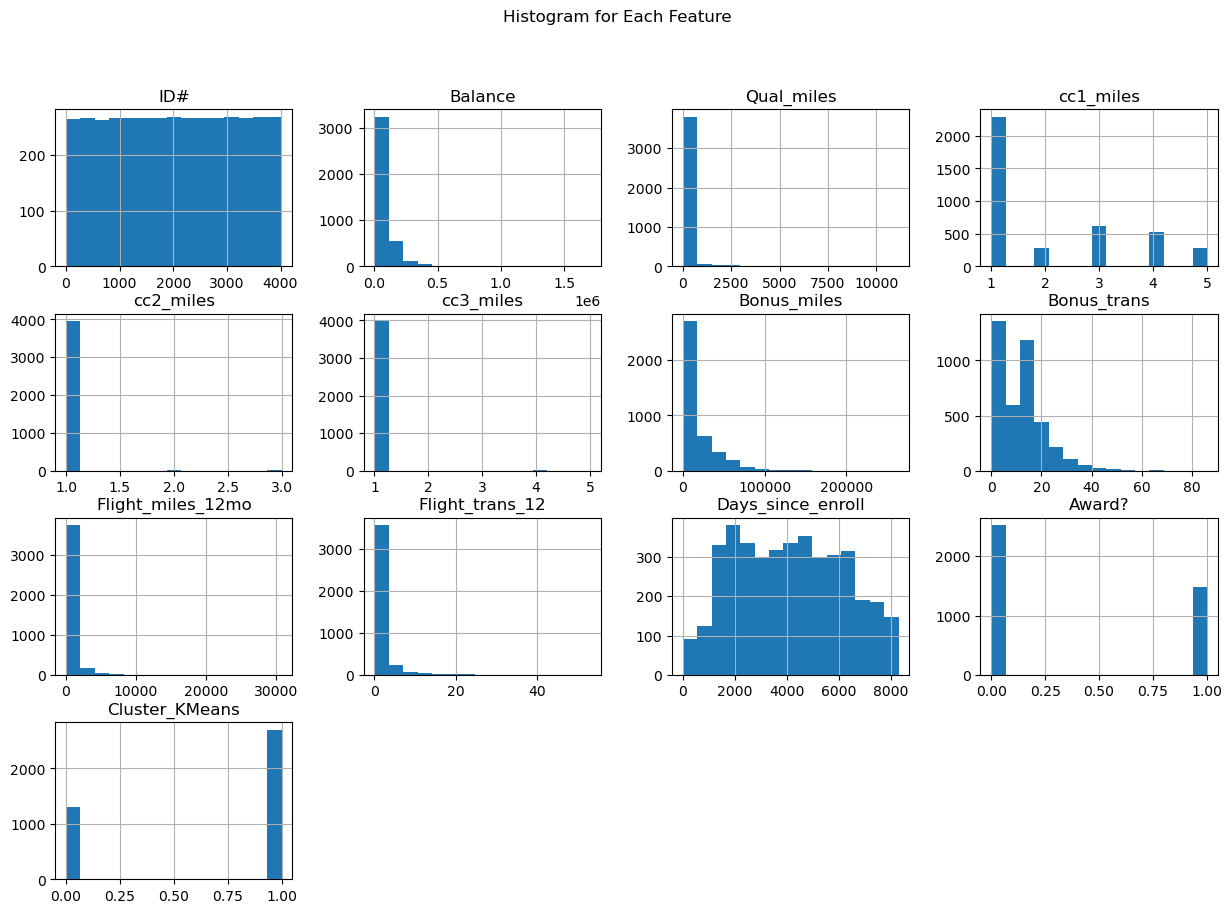

In [76]:
# Histogram
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram for Each Feature")
plt.show()

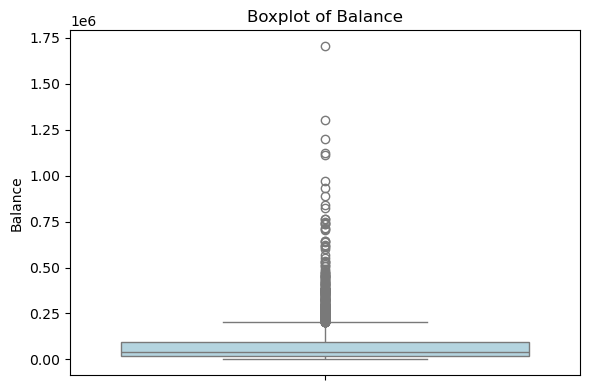

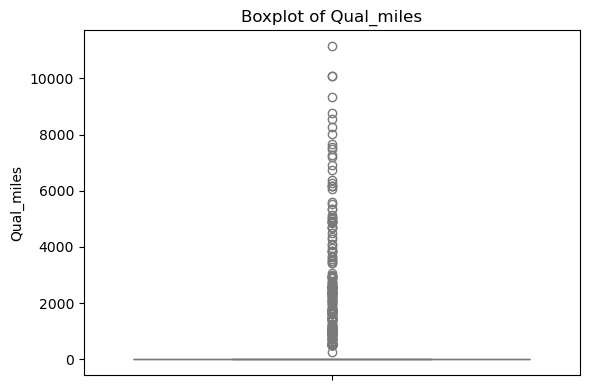

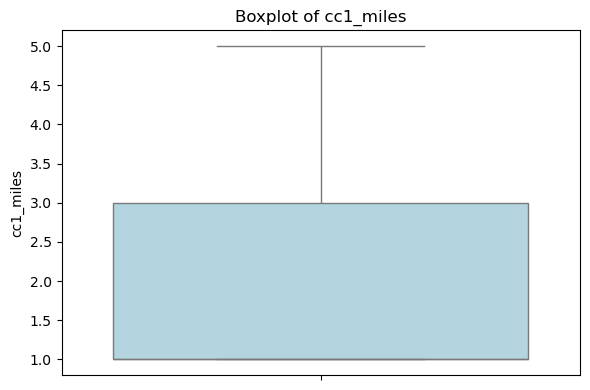

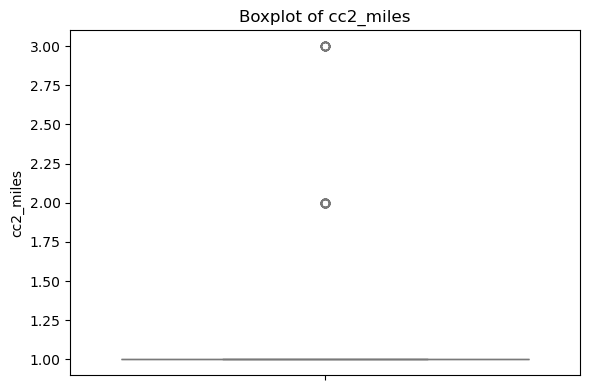

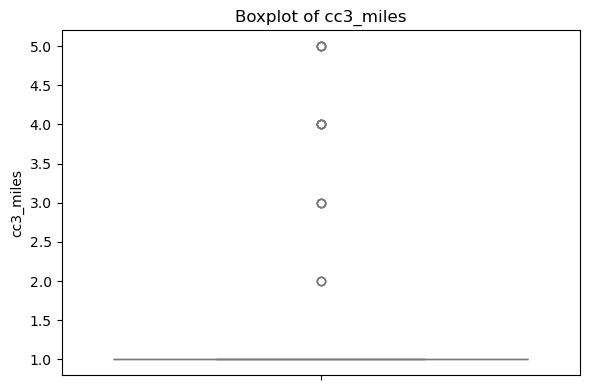

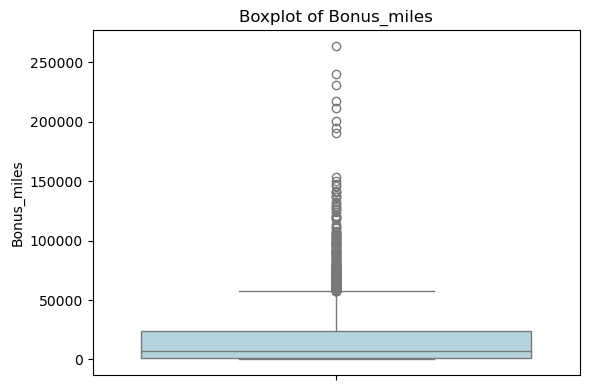

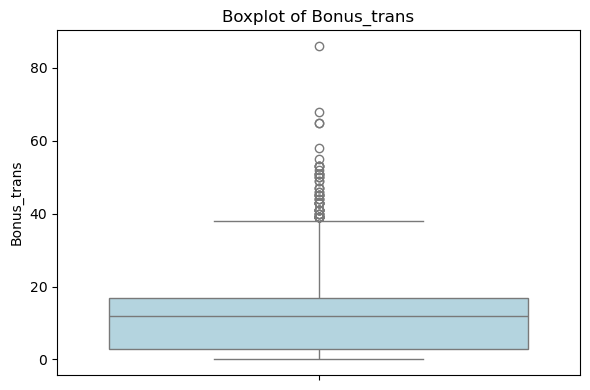

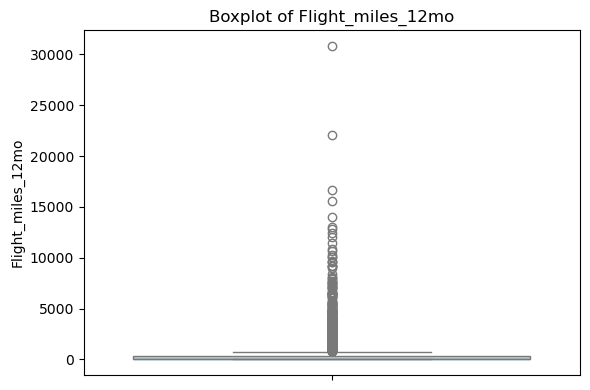

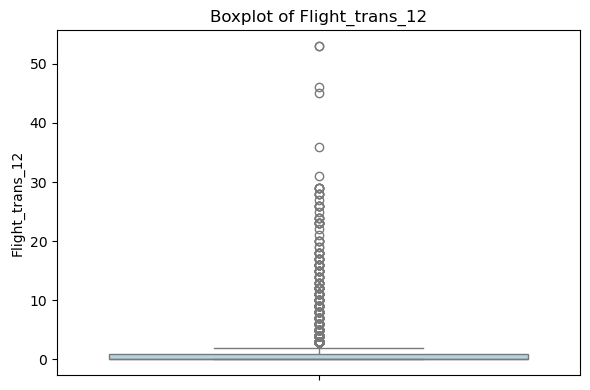

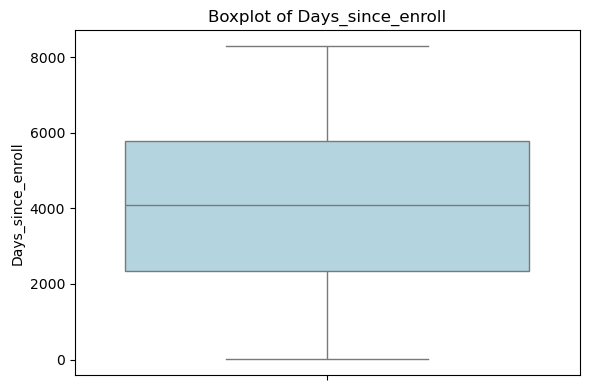

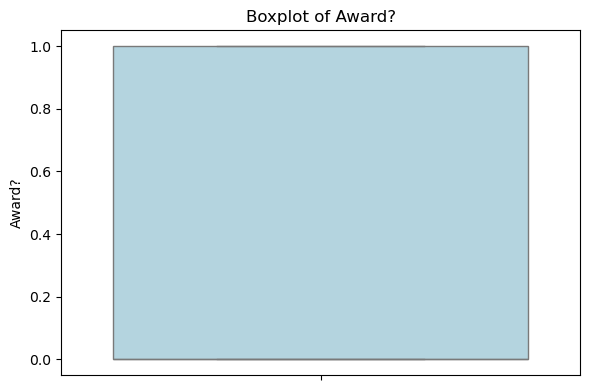

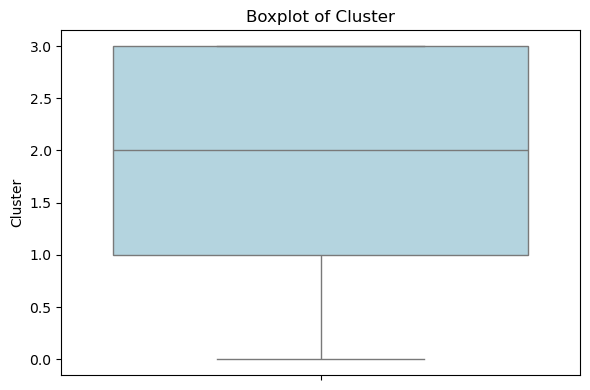

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df_clean.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_clean[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()


In [ ]:
#  It  shows outliers in features like `Bonus_miles`, `Balance`, and `Flight_miles_12mo.

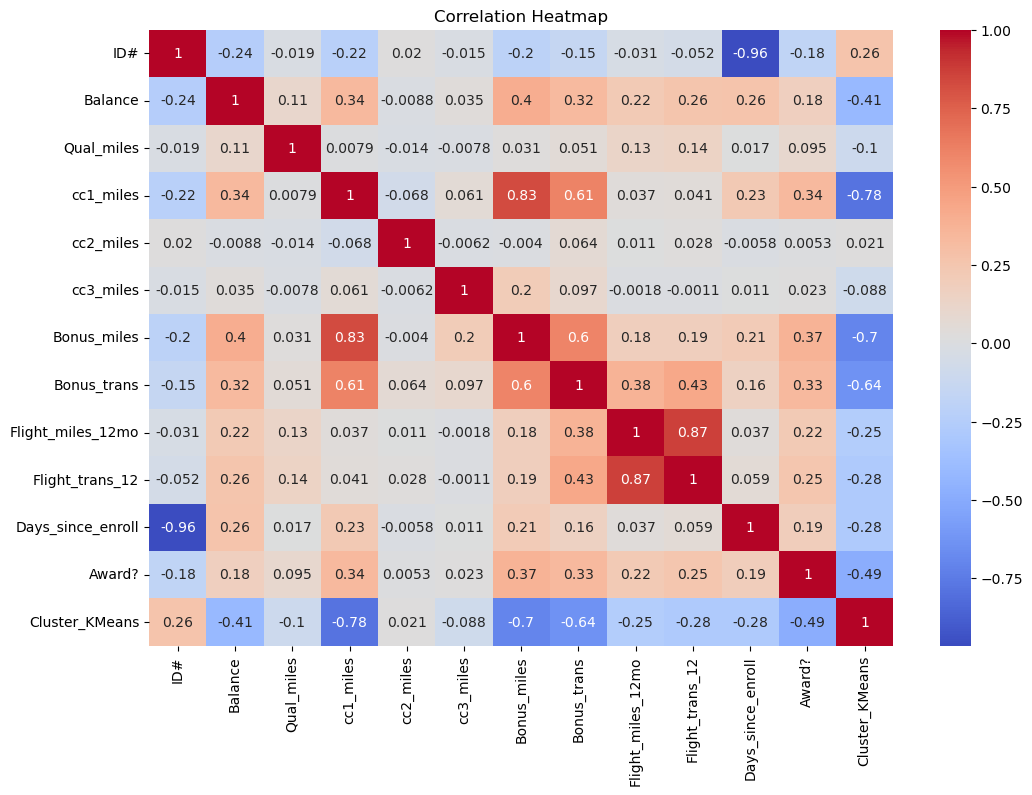

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# reveals strong correlations among features (e.g., Bonus miles and Bonus transactions).

## Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

## KMeans Clustering

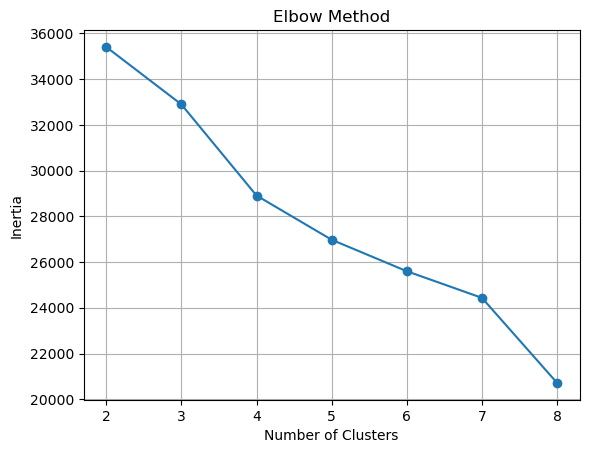

In [43]:
from sklearn.cluster import KMeans

# Try with 3 to 8 clusters and check the elbow method
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 9), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Apply KMeans with Optimal K

In [72]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df['Cluster_KMeans'] = kmeans.labels_

## Silhouette Score for KMeans

In [73]:
sil_score_kmeans = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score (KMeans): {sil_score_kmeans:.4f}")

Silhouette Score (KMeans): 0.3254


In [ ]:
# Elbow shows optimal `k = 2`.
# Silhouette Score indicates reasonable clustering quality.

## KMeans Scatter Plot

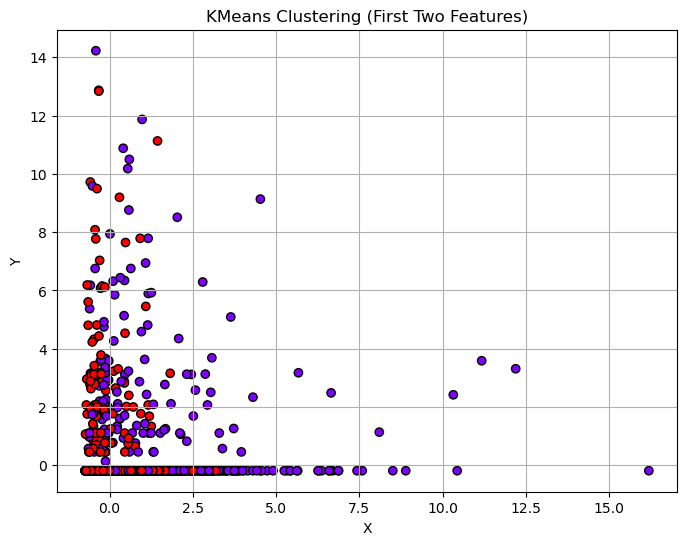

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow', edgecolor='k')
plt.title("KMeans Clustering (First Two Features)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## DBSCAN Clustering

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('ID#', axis=1))  # drop ID if still present

In [56]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN (default values, we will tune later)
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [57]:
# eps: max distance for neighborhood.
# min_samples: number of minimum points in a cluster.
# dbscan_labels: Cluster labels (e.g., 0, 1, -1 for noise)

In [58]:
import numpy as np

# Count actual clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 5
Number of noise points: 310


## DBSCAN Scatter Plot

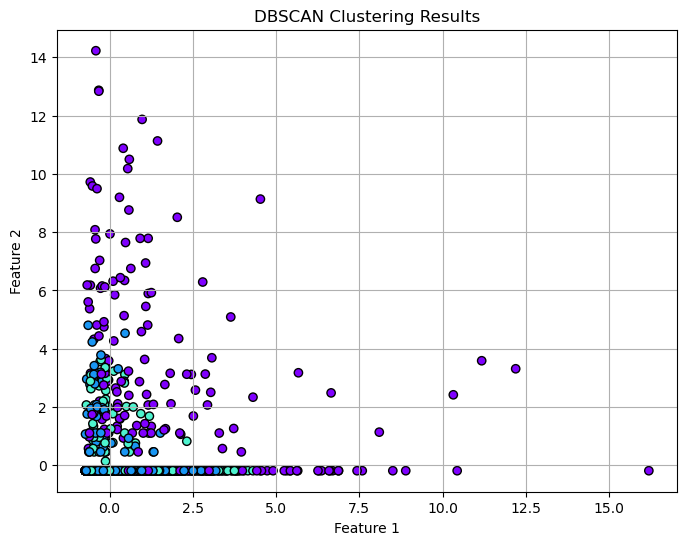

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow', edgecolors='k')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Silhouette Score for DBSCAN

In [60]:
from sklearn.metrics import silhouette_score

if n_clusters > 1:
    score = silhouette_score(X_scaled, dbscan_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette score not valid (only one cluster or all noise).")

Silhouette Score: 0.2537


In [88]:
# Identified clusters but may mark many as noise (-1).
# Sensitive to `eps` value.

In [99]:
# KMeans performed better in terms of creating usable clusters.
# Silhouette Score for KMeans is moderate  clusters are present but overlapping.

## Evaluation for kmeans

In [100]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, kmeans.labels_)

0.32542136327826215

In [102]:
# Silhouette Score for KMeans is moderate  clusters are present but overlapping.

## Evaluation for DBSCAN

In [95]:
import numpy as np
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


In [96]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, dbscan.labels_)

0.253747538041624

In [ ]:
# Use KMeans when:

# You know the number of clusters

# Data is well-separated and scaled

# Use DBSCAN when:

# Data has noise/outliers

# Clusters are irregularly shaped

## conclusion

In [98]:
# KMeans should be preferred for this data.
# Further improvement might come from feature engineering, dimensionality reduction (PCA), or domain-specific data cleaning.